# Housing prices - Data Analysis and Predicting Market Value

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('regression_data.csv')
data.head(3)

id      date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  7129300520  10/13/14         3       1.00         1180      5650     1.0   
1  6414100192   12/9/14         3       2.25         2570      7242     2.0   
2  5631500400   2/25/15         2       1.00          770     10000     1.0   

   waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  \
0           0     0          3      7        1180              0      1955   
1           0     0          3      7        2170            400      1951   
2           0     0          3      6         770              0      1933   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15   price  
0             0    98178  47.5112 -122.257           1340        5650  221900  
1          1991    98125  47.7210 -122.319           1690        7639  538000  
2             0    98028  47.7379 -122.233           2720        8062  180000

In [3]:
data.shape

(21597, 21)

In [4]:
# columns meaning https://geodacenter.github.io/data-and-lab/KingCounty-HouseSales2015/

In [5]:
data.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  int64  
 8   view           21597 non-null  int64  
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  int64  
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  int64  
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

Initial observations/ to-do:
- 'id' column redundant for our purpose, as it simply represent a unit entry. I will remove it.
- change 'bathrooms', 'floors' to integer as decimal for example 2.25 number of bathrooms does not make sence practically 
- possibly combine 'bedrooms' and 'bathrooms' columns into number of rooms total. first try and check the importance of them separately (correlation with our target value 'price') 

In [7]:
#drop 'id' as it is not needed for our purpose and our data will be lighter for it
data = data.drop(['id'], axis=1)
data.head(2)

date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  10/13/14         3       1.00         1180      5650     1.0           0   
1   12/9/14         3       2.25         2570      7242     2.0           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3      7        1180              0      1955             0   
1     0          3      7        2170            400      1951          1991   

   zipcode      lat     long  sqft_living15  sqft_lot15   price  
0    98178  47.5112 -122.257           1340        5650  221900  
1    98125  47.7210 -122.319           1690        7639  538000

<AxesSubplot:>

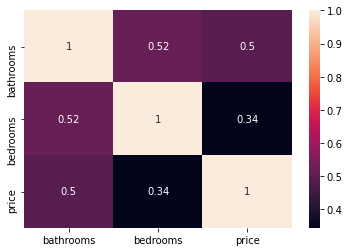

In [8]:
sns.heatmap(data[["bathrooms","bedrooms","price"]].corr(method="spearman"),annot=True)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bathrooms', ylabel='price'>

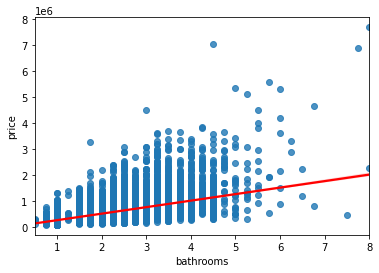

In [9]:
sns.regplot(data['bathrooms'], data['price'], line_kws={"color": "red"})

the column have somewhat statistical importance. Will test again after combining them.

In [10]:
data["rooms"]= data["bathrooms"]+data["bedrooms"]
data["rooms"]

0        4.00
1        5.25
2        3.00
3        7.00
4        5.00
         ... 
21592    5.50
21593    6.50
21594    2.75
21595    5.50
21596    2.75
Name: rooms, Length: 21597, dtype: float64

<AxesSubplot:>

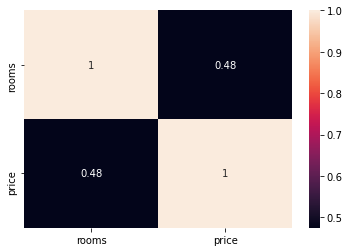

In [11]:
sns.heatmap(data[["rooms","price"]].corr(method="spearman"),annot=True)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='rooms', ylabel='price'>

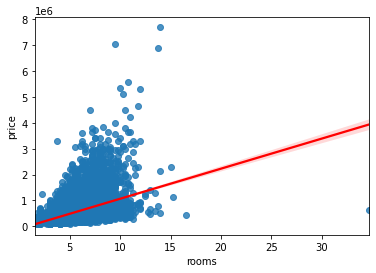

In [12]:
sns.regplot(data['rooms'], data['price'], line_kws={"color": "red"})

Resulted in value ending in between what the correlation was when separate. It should not have an impact later on our model too much.

In [13]:
data.drop(["bathrooms","bedrooms"], axis=1, inplace=True)
data.head(2)

date  sqft_living  sqft_lot  floors  waterfront  view  condition  \
0  10/13/14         1180      5650     1.0           0     0          3   
1   12/9/14         2570      7242     2.0           0     0          3   

   grade  sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
0      7        1180              0      1955             0    98178  47.5112   
1      7        2170            400      1951          1991    98125  47.7210   

      long  sqft_living15  sqft_lot15   price  rooms  
0 -122.257           1340        5650  221900   4.00  
1 -122.319           1690        7639  538000   5.25

'sqft_living' is the sum of 'sqft_above' and 'sqft_basement'. Lets check if we can delete 'sqft_above' and 'sqft_basement' and have 'sqft_living'  represent it

<AxesSubplot:>

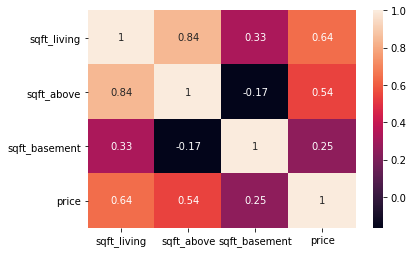

In [14]:
sns.heatmap(data[["sqft_living", "sqft_above", "sqft_basement", "price"]].corr(method="spearman"),annot=True)

In [17]:
data.drop(["sqft_above","sqft_basement"],axis=1,inplace=True)
data.head(2)

date  sqft_living  sqft_lot  floors  waterfront  view  condition  \
0  10/13/14         1180      5650     1.0           0     0          3   
1   12/9/14         2570      7242     2.0           0     0          3   

   grade  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      7      1955             0    98178  47.5112 -122.257           1340   
1      7      1951          1991    98125  47.7210 -122.319           1690   

   sqft_lot15   price  rooms  
0        5650  221900   4.00  
1        7639  538000   5.25

The decimals for 'floors' and 'rooms' column is unessary. Change to Integer as follows. 

In [21]:
data['floors'] = data['floors'] .astype(int)

In [22]:
data['rooms'] = data['rooms'] .astype(int)

In [23]:
data.head(2)

date  sqft_living  sqft_lot  floors  waterfront  view  condition  \
0  10/13/14         1180      5650       1           0     0          3   
1   12/9/14         2570      7242       2           0     0          3   

   grade  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      7      1955             0    98178  47.5112 -122.257           1340   
1      7      1951          1991    98125  47.7210 -122.319           1690   

   sqft_lot15   price  rooms  
0        5650  221900      4  
1        7639  538000      5

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


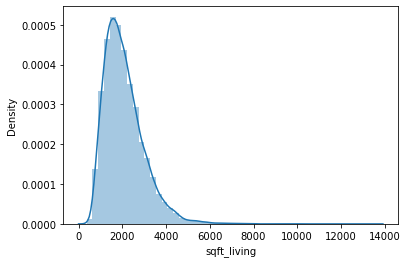

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


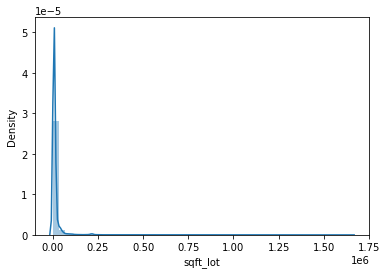

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


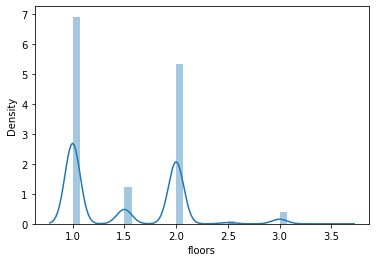

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


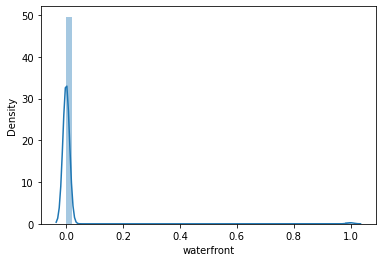

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


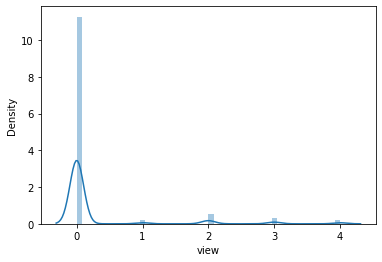

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


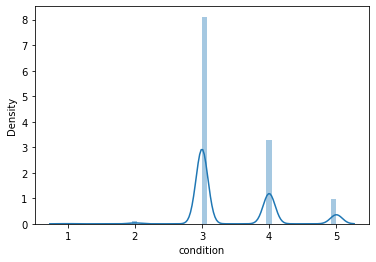

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


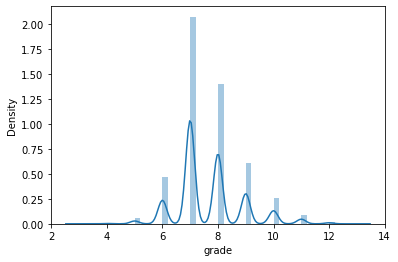

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


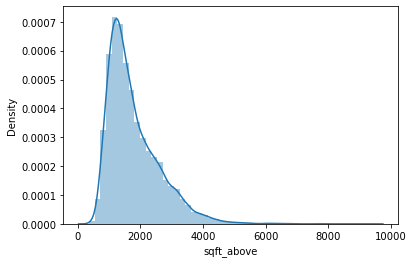

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


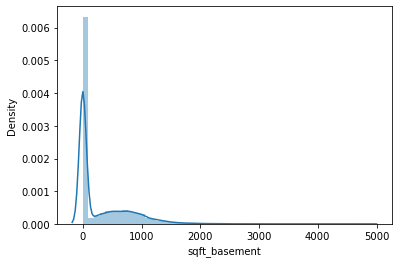

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


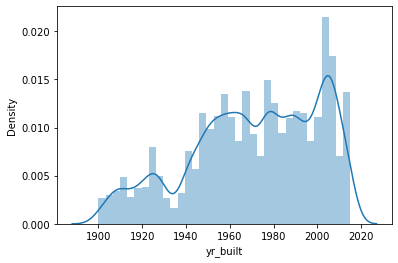

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


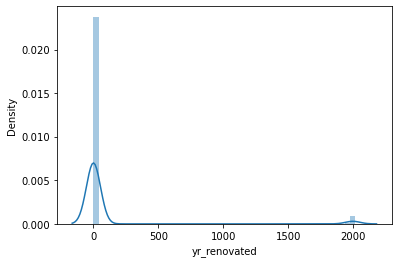

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


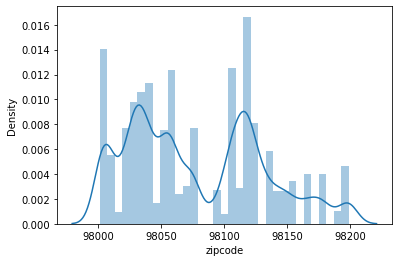

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


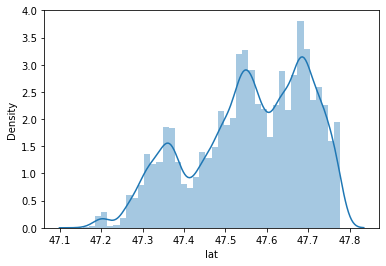

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


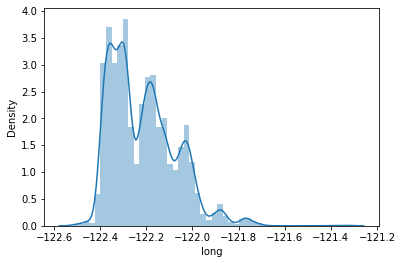

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


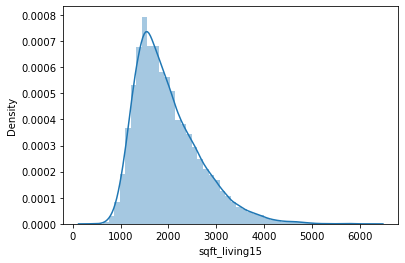

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


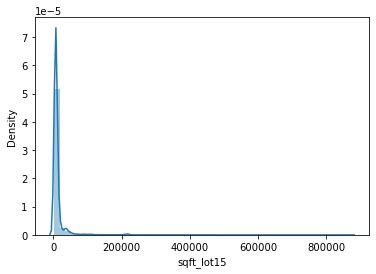

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


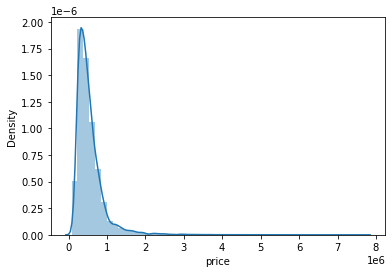

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


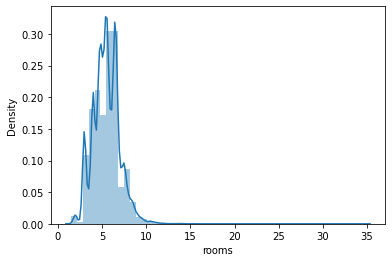

In [15]:
for column in data.select_dtypes(np.number).columns:
    sns.distplot(data[column])
    plt.show()